In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow import keras
from time import perf_counter 
import os
from tensorflow.keras.models import Sequential
from keras.utils.vis_utils import plot_model

In [2]:
## Defining batch specfications
batch_size = 16
img_height = 224
img_width = 224

In [3]:
## loading training set
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    'train',
    seed=40,
    image_size= (img_height, img_width),
    batch_size=batch_size,
#   color_mode = 'grayscale'

)
class_names = train_ds.class_names
print(class_names)
#train_ds

Found 1364 files belonging to 2 classes.
['Accident', 'Non Accident']


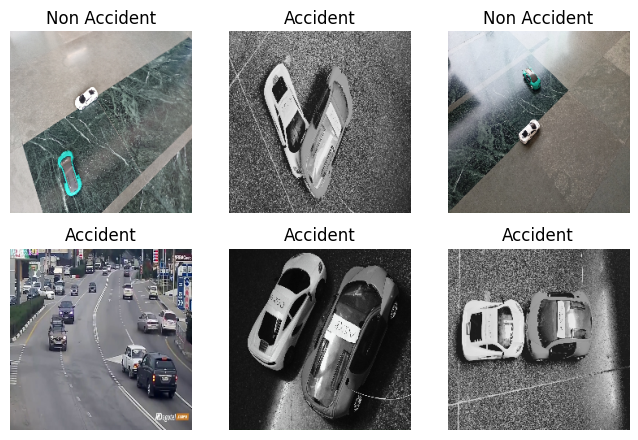

In [4]:
plt.figure(figsize=(8, 8))
for images, labels in train_ds.take(1):
  for i in range(6):
    ax = plt.subplot(3, 3, i+1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [5]:
## loading validation dataset
val_ds =  tf.keras.preprocessing.image_dataset_from_directory(
    'val',
    seed=40,
    image_size= (img_height, img_width),
    batch_size=batch_size)


Found 180 files belonging to 2 classes.


In [6]:
testing_ds = tf.keras.preprocessing.image_dataset_from_directory(
    'test',
    seed=40,
    image_size= (img_height, img_width),
    batch_size=batch_size)

for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break
#Batch of 10 images of shape(200x200x3)

Found 263 files belonging to 2 classes.
(16, 224, 224, 3)
(16,)


In [7]:
#Interested readers can learn more about both methods, 
#as well as how to cache data to disk in the Prefetching section of the 
#Better performance with the tf.data API guide
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
testing_ds = testing_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [8]:
#normalization_layer = layers.Rescaling(1./255)
#use it

#normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
#image_batch, labels_batch = next(iter(normalized_ds))
#first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
#print(np.min(first_image), np.max(first_image))

In [9]:
## Defining model
# Different ways to classify image datasets:
# 1. Artificial Neural Network.
# 2. Convolutional Neural Network (done)
# 3. K nearest neighbor.
# 4. Decision tree.
# 5. Support Vector Machines
Model = Sequential([
  layers.BatchNormalization(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(256, activation='relu'),
  layers.Dense(len(class_names), activation= 'softmax')
])

Model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#Model.summary()

In [10]:
# lets train our Model
retVal = Model.fit(train_ds, validation_data= val_ds, epochs = 10)

Epoch 1/10


KeyboardInterrupt: 

In [ ]:
## stats on training data
plt.plot(retVal.history['loss'], label = 'training loss')
plt.plot(retVal.history['accuracy'], label = 'training accuracy')
plt.grid(True)
plt.legend()

In [ ]:
## stats on validation data
plt.plot(retVal.history['val_loss'], label = 'validation loss')
plt.plot(retVal.history['val_accuracy'], label = 'validation accuracy')
plt.grid(True)
plt.legend()

In [ ]:
## lets vizualize results on testing data
AccuracyVector = []
plt.figure(figsize=(15, 15))
for images, labels in testing_ds.take(1):
    predictions = Model.predict(images)
    predlabel = []
    prdlbl = []
    
    for mem in predictions:
        predlabel.append(class_names[np.argmax(mem)])
        prdlbl.append(np.argmax(mem))
    
    AccuracyVector = np.array(prdlbl) == labels
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title('Pred: '+ predlabel[i]+' actl:'+class_names[labels[i]])
        plt.axis("off")
print(predictions)

In [ ]:
#    for i in range(40):
#        ax = plt.subplot(10, 4, i + 1)
#        plt.imshow(images[i].numpy().astype("uint8"))
#        plt.title('Pred: '+ predlabel[i]+' actl:'+class_names[labels[i]] )
#        plt.axis('off')
#        plt.grid(True)

In [5]:
Model.save('Model_BS_16_new.h5')

NameError: name 'Model' is not defined

In [16]:
#plot_model(Model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)